In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance

from math import log
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [77]:
df = pd.read_csv(r'C:\Users\aalok\Downloads\archive.zip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [78]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [79]:
pd.set_option('display.max_columns', None)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [80]:
df.shape

(3333, 21)

In [81]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

**Data Cleaning**


**Initial Thoughts**

From what we can see above there seems to be three types of data stored in the columns - ordinal, nominal, numerical. Below is a list of which each column falls into.

Numerical (14) - "number vmail messages", "total day minutes", "total day calls", "total day charge", "total even minutes", "total eve calls", "total eve charge", "total night minutes", "total night calls", "total night charge", "total night minutes", "total intl calls", "total intl charge", "customer service calls", "account length"

Ordinal (3) - "international plan", "voice mail plan", "churn"

Nominal (3) - "state", "phone number", "area code"

All columns will need the standard scaler applied to them, ordinal variables may need to be OHE or simply replaced inplace with 0 or 1. Pending analysis to suggest otherwise area code and phone number seem like they can be dropped. It is possible however that a given state or area code could have a high correlation with churn - our target. 

In [82]:
df.replace('no', 0, inplace=True)
df.replace('yes', 1, inplace=True)
df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)

**CHECK IF ITS ACTUALLY IMBALANCED** - find out what domain info is there for class imbalance

In [83]:
df['churn'].value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

In [84]:
df['international plan'].value_counts()

0    3010
1     323
Name: international plan, dtype: int64

In [85]:
df['voice mail plan'].value_counts()

0    2411
1     922
Name: voice mail plan, dtype: int64

The ordinal variables seem to have been taken care of - now we can drop phone number as this is unique to every single customer. 

In [86]:
df = df.drop(['phone number'], axis=1)

In [87]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

All three of the are codes seen above are from the San Francisco Bay Area - this does not match with our state values (see below). We can drop area code because it does not seem to lineup with the rest of the data. 

In [88]:
df = df.drop(['area code'], axis=1)

In [89]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
CO     66
NV     66
WA     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

States in the format that they are in currently does not seem very useful. We probably want to group states by region and see if there are regional influences on churn. 

There is no official demarcation of US states by region, however, we choose [this](https://www.ducksters.com/geography/us_states/us_geographical_regions.php) split for regions.

After mapping the regions into numerical categories we OneHotEncode them. 

In [90]:
df['region'] = df['state'].map({'CA': 0, 'NV': 0, 'UT': 0, 'CO': 0, 'WY': 0, 'ID' : 0, 'MT' : 0, 'OR' : 0, 'WA' : 0, 'AK' : 0, 'HI' : 0, 'AZ' : 1, 'NM' : 1, 'OK' : 1, 'TX' : 1, 'ND': 2, 'SD' : 2, 'KS' : 2, 'NE' : 2, 'MO' : 2, 'IA' : 2, 'MN' : 2, 'WI' : 2,'IL' : 2,'IN' : 2, 'OH' : 2, 'MI' : 2, 'AR' : 3, 'TN' : 3 , 'LA' : 3, 'MS' : 3,'AL' : 3, 'GA' : 3, 'FL' : 3,'SC' : 3, 'NC' : 3, 'KY' : 3, 'VA' : 3,'WV' : 3, 'DC': 4, 'MD' : 4, 'DE' : 4, 'PA' : 4, 'NJ' : 4, 'NY' : 4, 'VT' : 4, 'NH' : 4, 'ME' : 4, 'MA' : 4, 'CT' : 4, 'RI' : 4})

In [91]:
#df['region'] = df['state'].map({'AZ' : 'Southwest', 'NM' : 'Southwest', 'OK' : 'Southwest', 'TX' : 'Southwest'})

In [92]:
#df['region'] = df['state'].map({'ND': 'Midwest', 'SD' : 'Midwest', 'KS' : 'Midwest', 'NE' : 'Midwest', 'MO' : 'Midwest', 'IA' : 'Midwest', 'MN' : 'Midwest', 'WI' : 'Midwest','IL' : 'Midwest','IN' : 'Midwest', 'OH' : 'Midwest', 'MI' : 'Midwest'})

In [93]:
#df['region'] = df['state'].map({'AR' : 'Southeast', 'TN' : 'Southeast' , 'LA' : 'Southeast', 'MS' : 'Southeast','AL' : 'Southeast', 'GA' : 'Southeast', 'FL' : 'Southeast','SC' : 'Southeast', 'NC' : 'Southeast', 'KY' : 'Southeast', 'VA' : 'Southeast','WV' : 'Southeast'})

In [94]:
#df['region'] = df['state'].map({'DC': 'Northeast', 'MD' : 'Northeast', 'DE' : 'Northeast', 'PA' : 'Northeast', 'NJ' : 'Northeast', 'NY' : 'Northeast', 'VT' : 'Northeast', 'NH' : 'Northeast', 'ME' : 'Northeast', 'MA' : 'Northeast', 'CT' : 'Northeast', 'RI' : 'Northeast'})

In [95]:
df['region'].value_counts()

2    802
3    791
4    776
0    705
1    259
Name: region, dtype: int64

**Adding Some Columns of Value**

In [96]:
df['total charge'] = (df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge'])
df['total mins'] = (df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes'])


**MODEL FUNCTIONS**

**MOVE THIS UP RIGHT AFTER IMPORTS**

In [97]:
#Model Prediction Function

def model_predictions(model, x_train, x_test, y_train, y_test):
    '''Enter model name and test/train sets to generate predictions, precision, recall, accuracy, and F1 score'''
    model.fit(x_train, y_train)
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    print('Training Precision: ', precision_score(y_train, y_hat_train))
    print('Testing Precision: ', precision_score(y_test, y_hat_test))
    print('-----')

    print('Training Recall: ', recall_score(y_train, y_hat_train))
    print('Testing Recall: ', recall_score(y_test, y_hat_test))
    print('-----')

    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('-----')

    print('Training F1-Score: ', f1_score(y_train, y_hat_train))
    print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

In [98]:
#Confusion Matrix Function

def confusion_matrix(model, x_test, y_test):
    '''Plot confusion matrix with test set'''
    plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Purples)
    plt.show()

In [99]:
#ROC FUNCTIONS

#ROC
def plot_roc(model, x_train, x_test, y_train, y_test):
    '''Plot ROC for test set and train set with decision_function'''
    y_test_score = model.decision_function(x_test)
    y_train_score = model.decision_function(x_train)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score)

    plt.figure(figsize = (6, 6))
    plt.plot(train_fpr, train_tpr, color = 'green', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'darkorange', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'navy', linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xticks(rotation = 90)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    
#ROC w PREDICT PROBA
def plot_roc_proba(model, X_train, X_test, y_train, y_test):
    '''Plot ROC for test set and train set with predict_proba'''
    y_test_score = model.predict_proba(X_test_scaled)
    y_train_score = model.predict_proba(X_train_scaled)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score[:,1])
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score[:,1])

    plt.figure(figsize = (6, 6))
    plt.plot(train_fpr, train_tpr, color = 'purple', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'grey', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'navy', linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xticks(rotation = 90)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

Below we split X (factors) from y (target)

In [100]:
y = df['churn']
X = df.drop(['state', 'churn'], axis=1)

In [101]:
y.value_counts(normalize=True)

0.0    0.855086
1.0    0.144914
Name: churn, dtype: float64

In [102]:
#Dummy Classifier -use this for baseline 

**Decision Trees Model 1**

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= 420)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


DTmodel = DecisionTreeClassifier(random_state=420)

DTmodel.fit(X_train_scaled, y_train)


model_predictions(DTmodel, X_train_scaled, X_test_scaled, y_train, y_test)

#super overfit - figure out how to regularize DT

Training Precision:  1.0
Testing Precision:  0.7653061224489796
-----
Training Recall:  1.0
Testing Recall:  0.8241758241758241
-----
Training Accuracy:  1.0
Testing Accuracy:  0.9415292353823088
-----
Training F1-Score:  1.0
Testing F1-Score:  0.7936507936507936


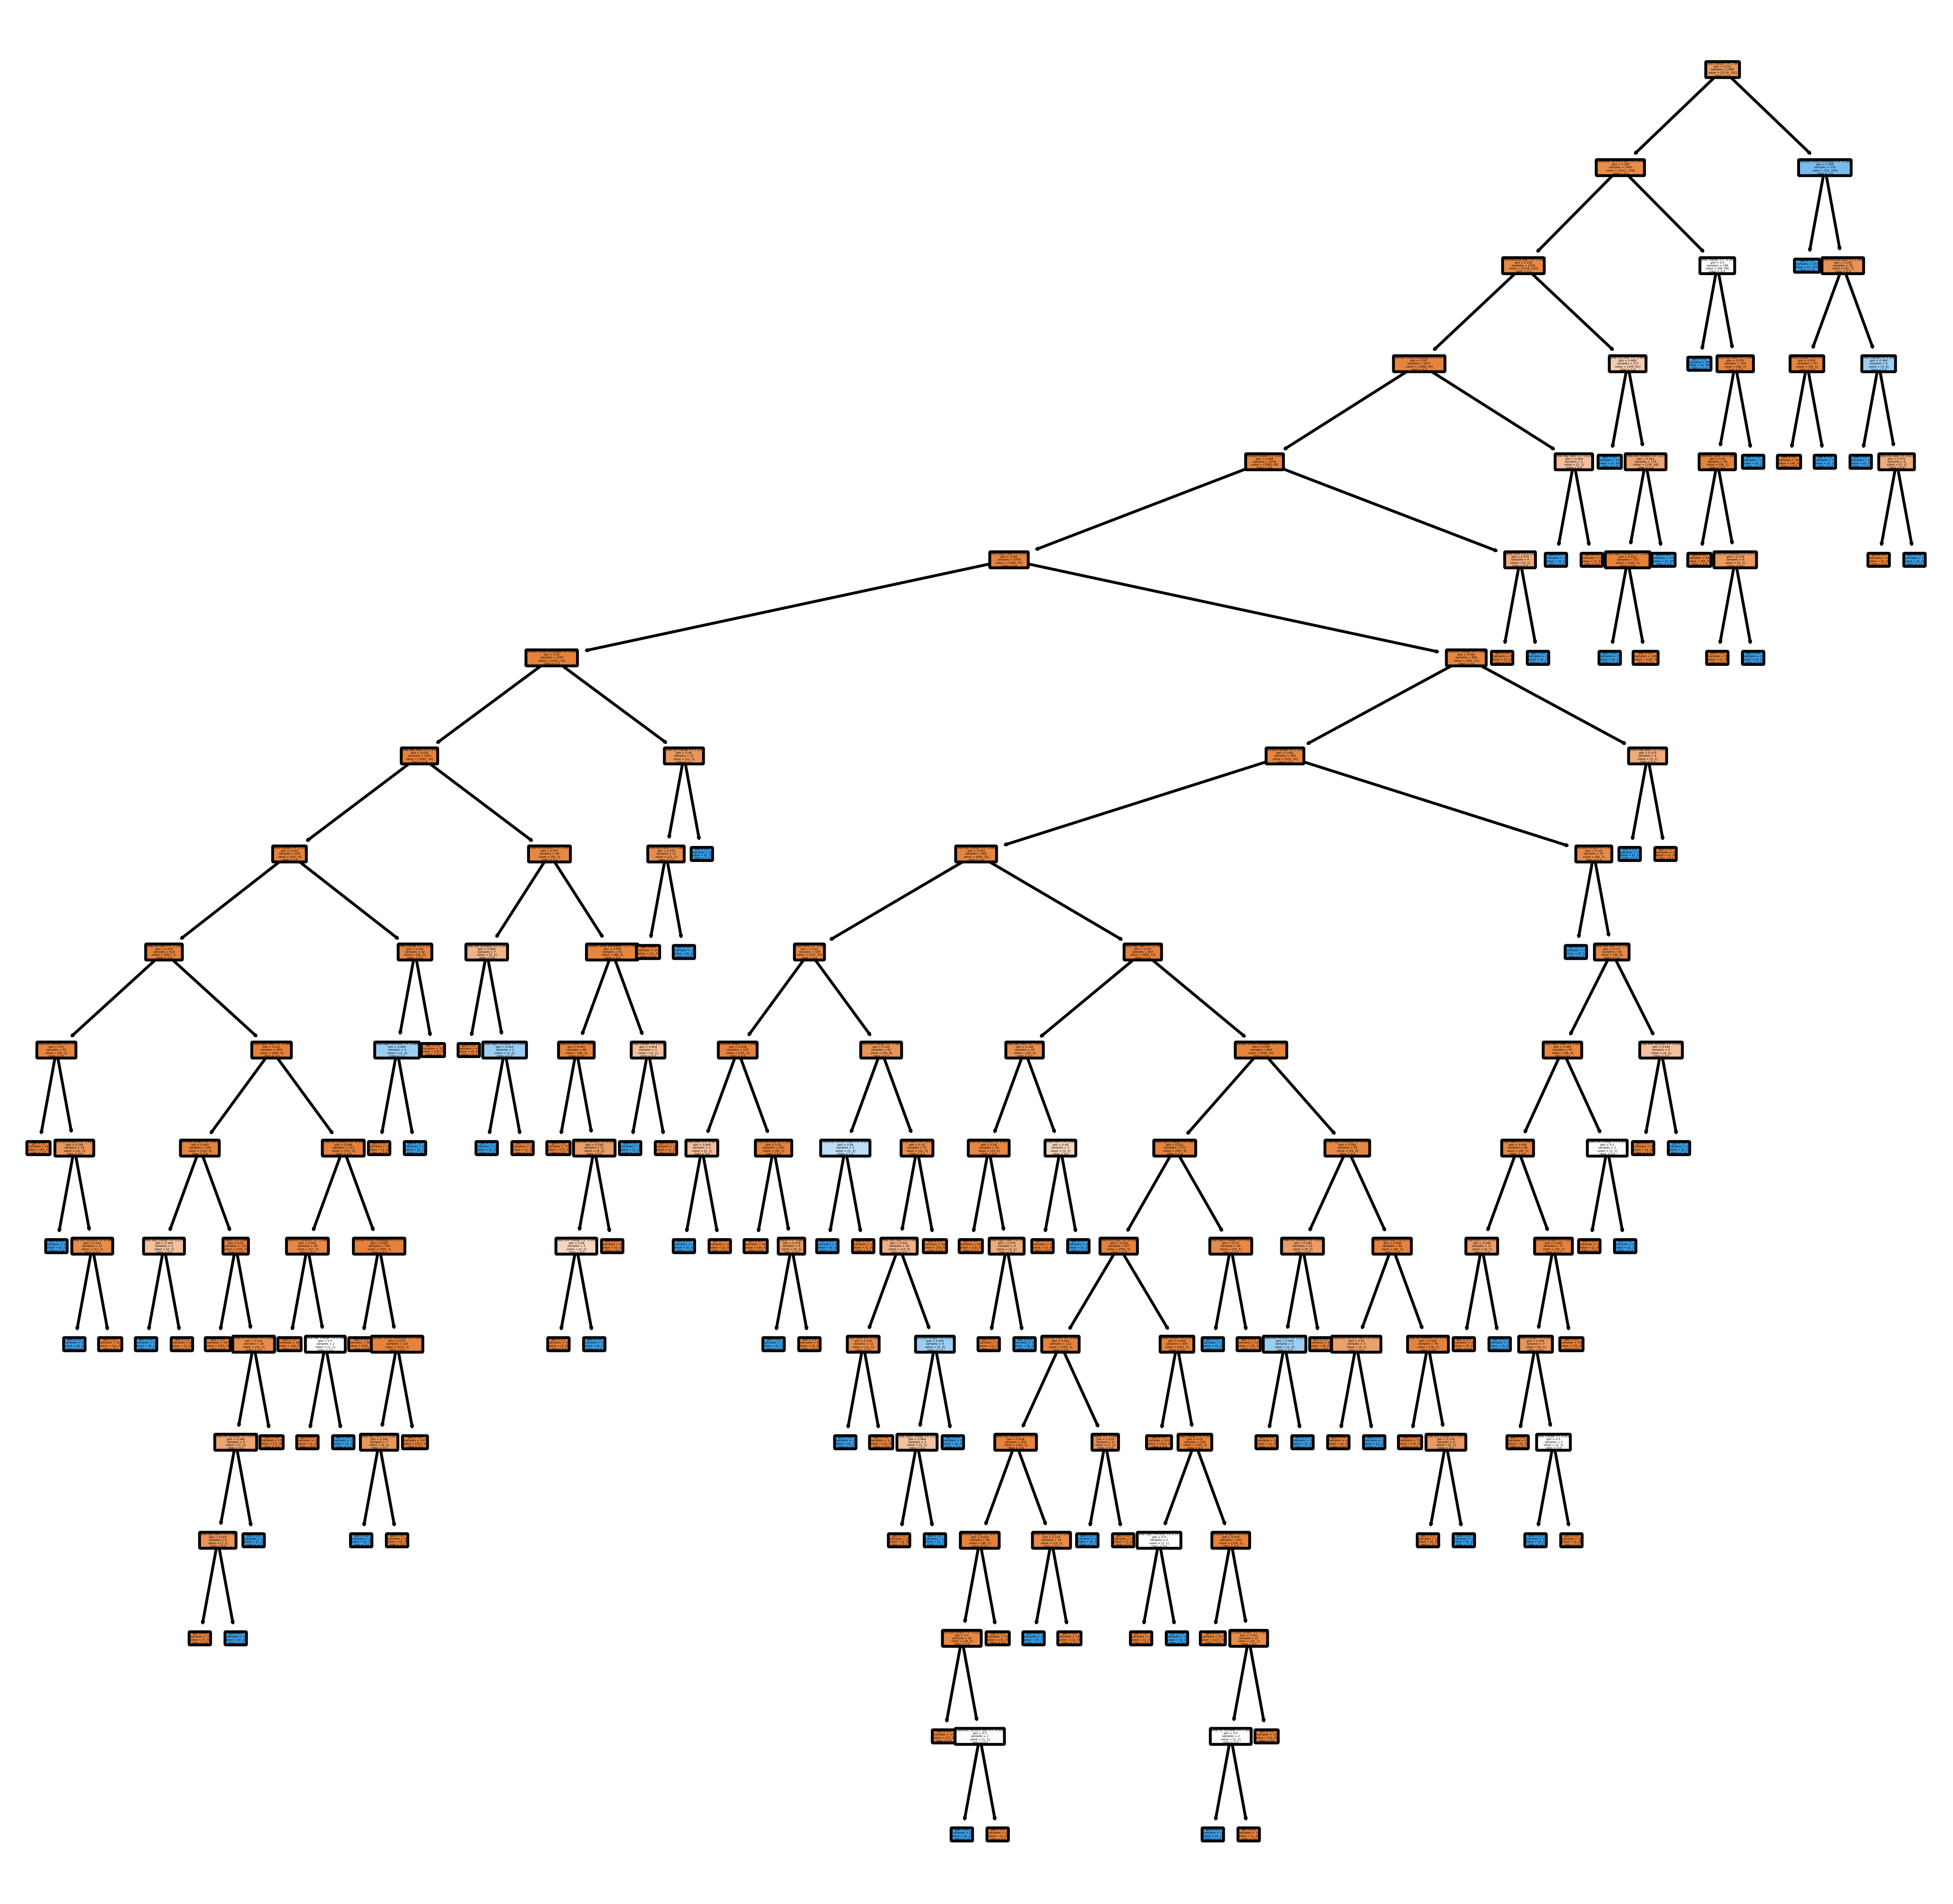

In [104]:
plt.figure(figsize=(12,12), dpi=500, edgecolor='black')

tree.plot_tree(DTmodel, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

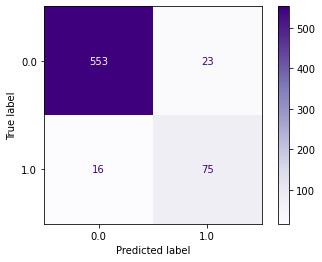

In [105]:
confusion_matrix(DTmodel, X_test_scaled, y_test)

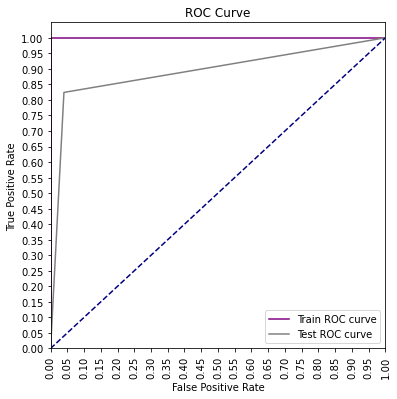

Train AUC: 1.0
Test AUC: 0.8921226343101343


In [106]:
plot_roc_proba(DTmodel, X_train_scaled, X_test_scaled, y_train, y_test)

**Decision Trees Model 2**

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= 420)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


DTmodel2 = DecisionTreeClassifier(criterion = 'entropy', random_state=420)

DTmodel2.fit(X_train_scaled, y_train)


model_predictions(DTmodel2, X_train_scaled, X_test_scaled, y_train, y_test)

Training Precision:  1.0
Testing Precision:  0.9036144578313253
-----
Training Recall:  1.0
Testing Recall:  0.8241758241758241
-----
Training Accuracy:  1.0
Testing Accuracy:  0.9640179910044977
-----
Training F1-Score:  1.0
Testing F1-Score:  0.8620689655172414


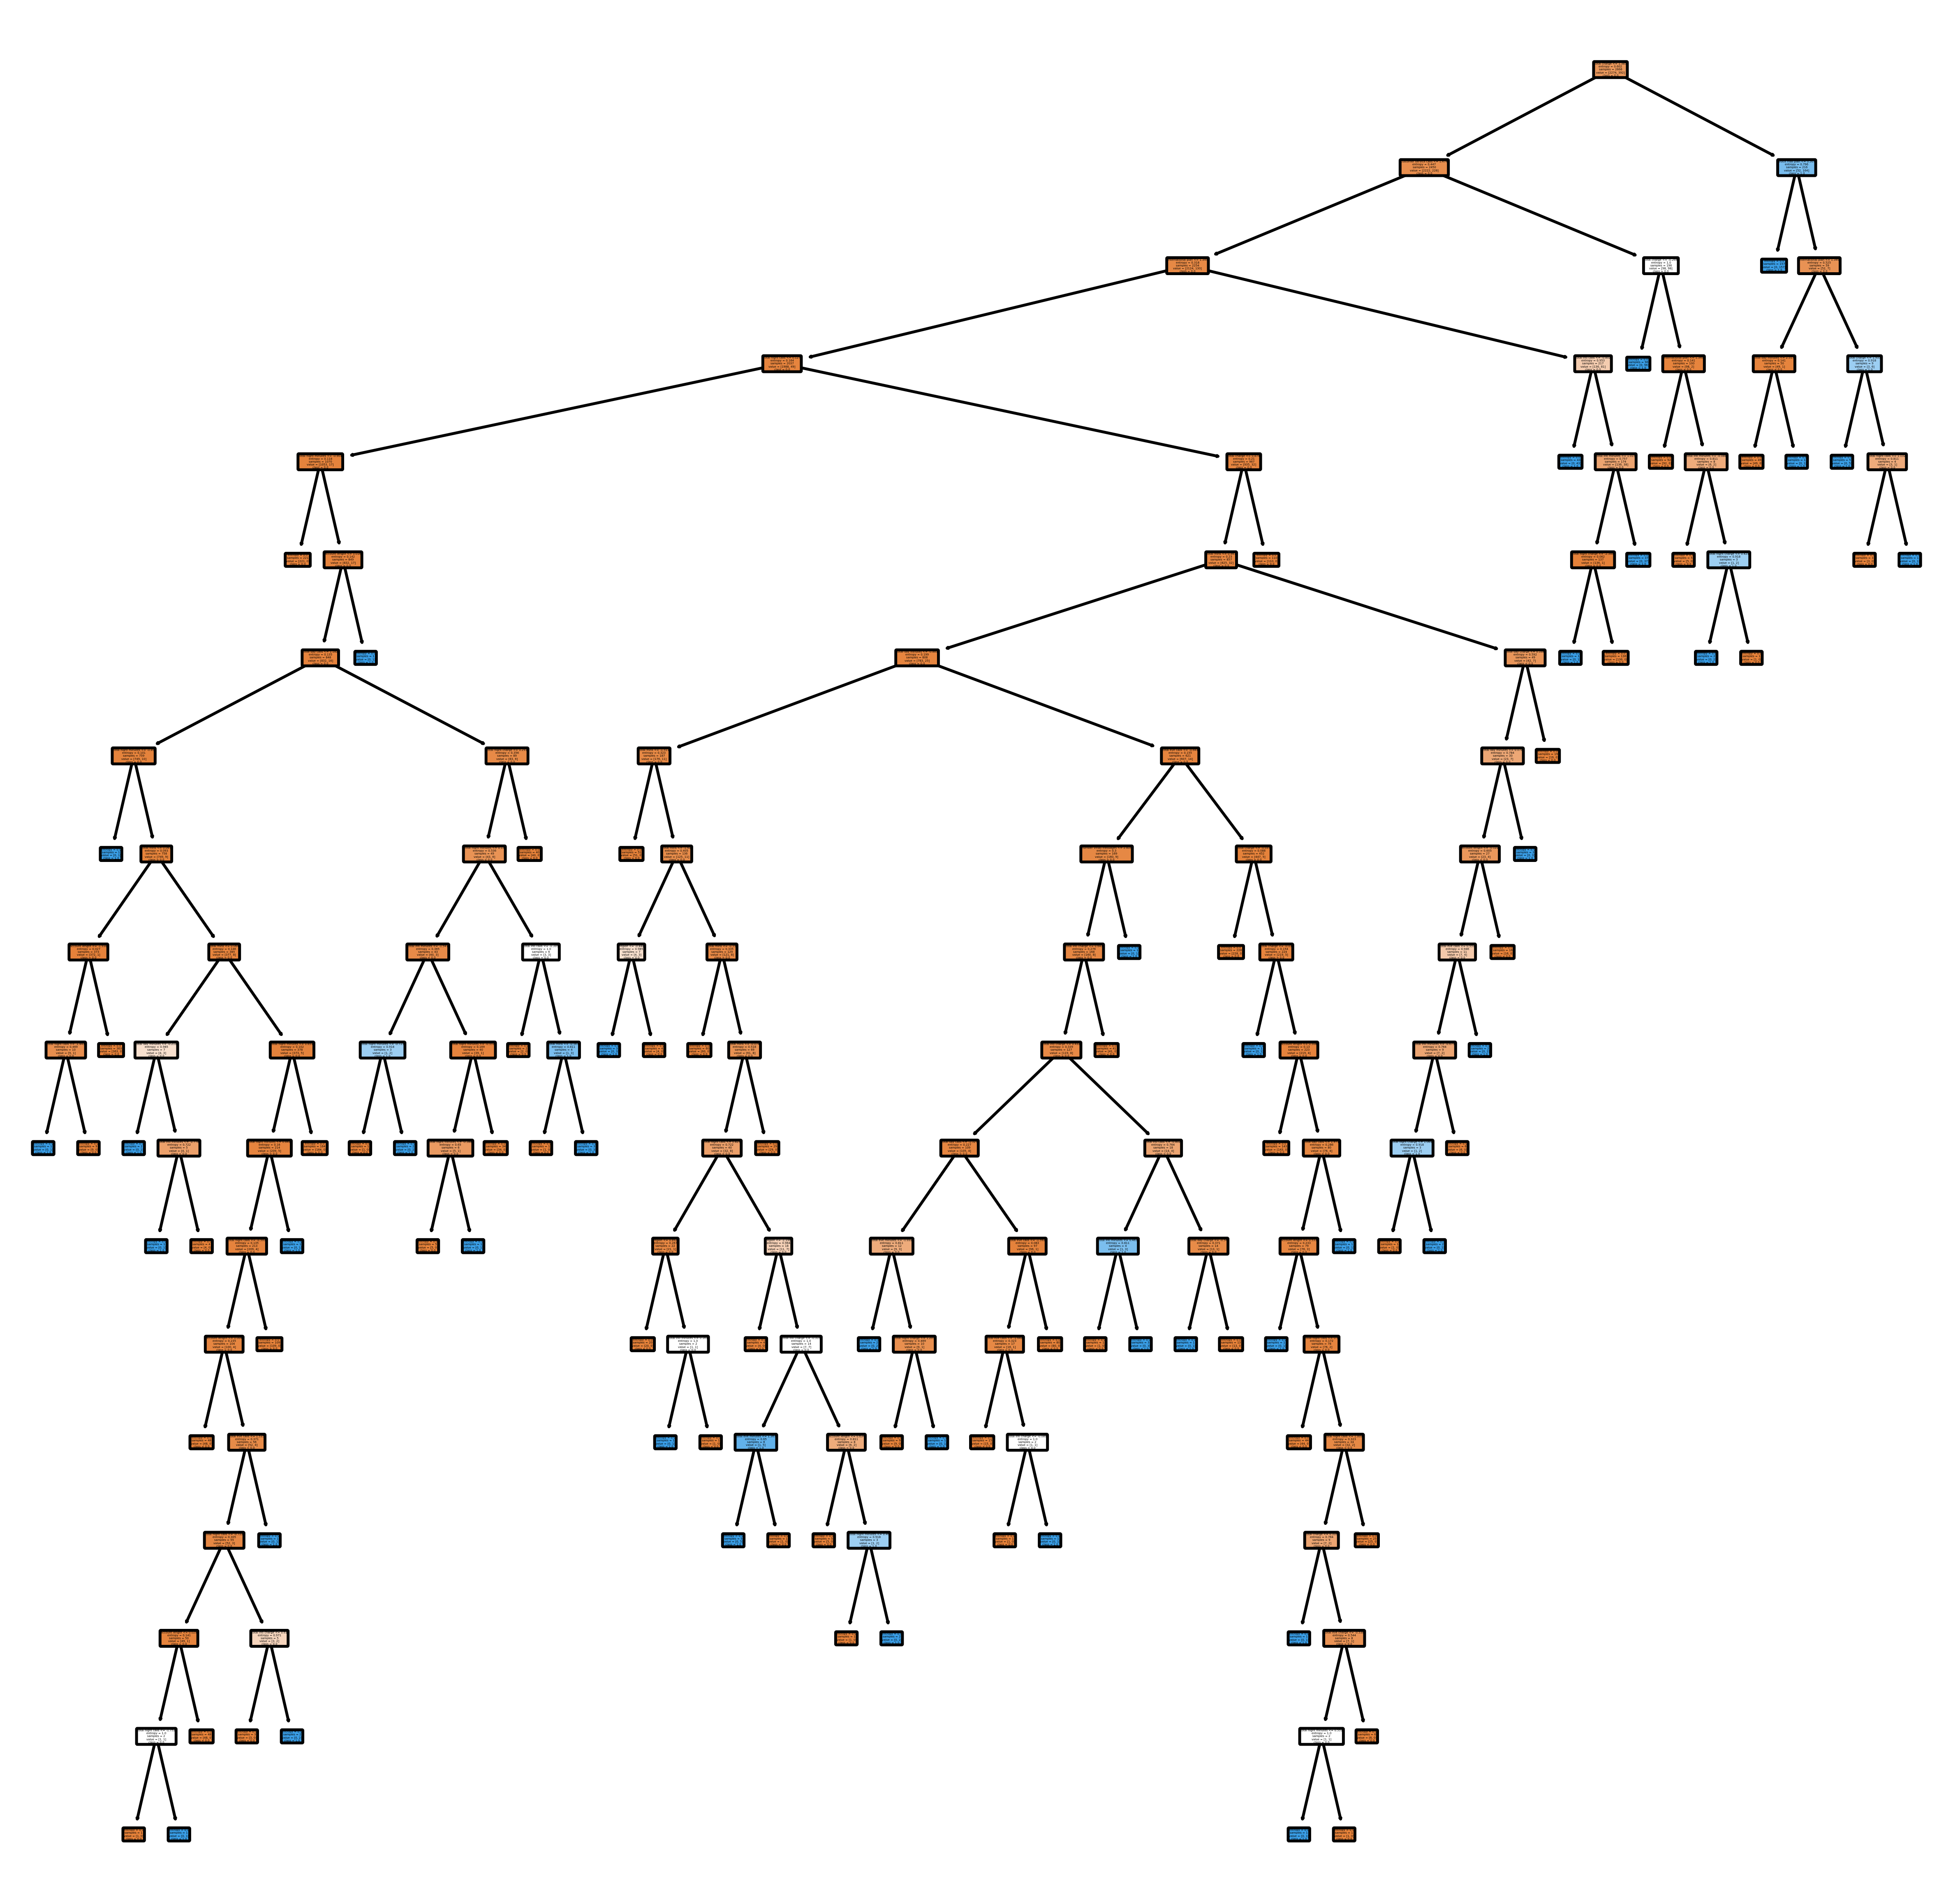

In [108]:
plt.figure(figsize=(12,12), dpi=500, edgecolor='black')

tree.plot_tree(DTmodel2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

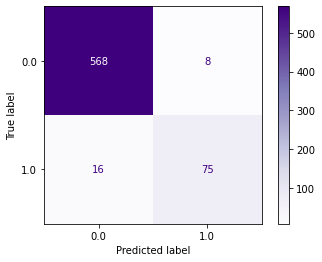

In [109]:
confusion_matrix(DTmodel2, X_test_scaled, y_test)

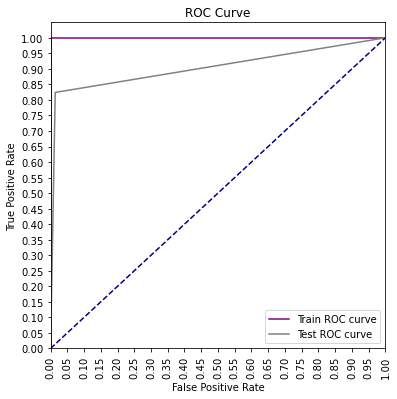

Train AUC: 1.0
Test AUC: 0.9051434676434676


In [110]:
plot_roc_proba(DTmodel2, X_train_scaled, X_test_scaled, y_train, y_test)

Analysis - changing between GINI and Entropy as the split criterion for our DT model does not really change much. Recall goes down while all the other metrics go up slightly. Test AUC using Entropy as criterion goes down as compared to Test AUC using GINI as criterion. We should try to do grid search to find the best parameters for our DT model. 

**MODEL TUNING**

There seems to be two major things we need to deal with - class imbalance and then finding the best parameters to use for our DT model. 

**Class Imbalance**

According to Google's machine learning [documentation](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data) this data set does in fact have moderate class imbalance. To deal with this we will try to do SMOTE and Oversampling.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= 420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
smote1 = SMOTE(sampling_strategy='minority', random_state=420)
# Fit and apply the transform
X_train_over, y_train_over = smote1.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over))

DTmodel3 = DecisionTreeClassifier(random_state=420)                       

DTmodel3.fit(X_train_over, y_train_over)

Counter({0.0: 2274, 1.0: 2274})


DecisionTreeClassifier(random_state=420)

In [112]:
model_predictions(DTmodel, X_train_scaled, X_test_scaled, y_train, y_test)

Training Precision:  1.0
Testing Precision:  0.7653061224489796
-----
Training Recall:  1.0
Testing Recall:  0.8241758241758241
-----
Training Accuracy:  1.0
Testing Accuracy:  0.9415292353823088
-----
Training F1-Score:  1.0
Testing F1-Score:  0.7936507936507936


In [113]:
model_predictions(DTmodel3, X_train_over, X_test_scaled, y_train_over, y_test)

Training Precision:  1.0
Testing Precision:  0.6915887850467289
-----
Training Recall:  1.0
Testing Recall:  0.8131868131868132
-----
Training Accuracy:  1.0
Testing Accuracy:  0.9250374812593704
-----
Training F1-Score:  1.0
Testing F1-Score:  0.7474747474747475


Surprisingly enough ... SMOTE is causing out test metrics across the board to go down - with precision taking the biggest hit. 

Lets try doing oversampling instead

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=420)
# Fit and apply the transform
X_train_over2, y_train_over2 = oversample.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over))

DTmodel4 = DecisionTreeClassifier(random_state=420)                       

DTmodel4.fit(X_train_over, y_train_over)

Counter({0.0: 2274, 1.0: 2274})


DecisionTreeClassifier(random_state=420)

In [115]:
model_predictions(DTmodel4, X_train_over2, X_test_scaled, y_train_over2, y_test)

Training Precision:  1.0
Testing Precision:  0.7307692307692307
-----
Training Recall:  1.0
Testing Recall:  0.8351648351648352
-----
Training Accuracy:  1.0
Testing Accuracy:  0.9355322338830585
-----
Training F1-Score:  1.0
Testing F1-Score:  0.7794871794871795


Oversampling works much better for this dataset than SMOTE. Meanwhile undersampling would not be viable for this dataset because it only contains 3500 rows!

**Gridsearch**

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

DTmodel_GS = DecisionTreeClassifier(random_state=420)

DT_grid = {
           'class_weight': ['None', 'balanced'],
           'criterion': ['gini', 'entropy'],
           'max_depth': [2, 3, 4, 5, 6, 7, 8],
           'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
           'min_samples_split': [2, 5, 10, 20],
           'random_state': [420]
          }

DT_GS = GridSearchCV(estimator = DTmodel_GS, 
                             param_grid = DT_grid, 
                             cv=5, 
                             return_train_score=True)

DT_GS.fit(X_train_scaled, y_train)

print('Best parameters for Our Decision Tree Model:')
DT_GS.best_params_


Best parameters for Our Decision Tree Model:


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 420}

Based off of the Gridsearch we can say that our best parameters for our DT model would be balanced class weight, entropy as a criterion, max depth of 5, min samples per leaf of 1, and a min samples per split of 2. We will use this to build our FinalDT.

**FinalDT**

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=420)
# Fit and apply the transform
X_train_over2, y_train_over2 = oversample.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over2))

FinalDT = DecisionTreeClassifier(class_weight = 'balanced',
 criterion = 'entropy',
 max_depth = 5,
 min_samples_leaf =1,
 min_samples_split = 2, random_state=420)                       

FinalDT.fit(X_train_over2, y_train_over2)

model_predictions(FinalDT, X_train_over2, X_test_scaled, y_train_over2, y_test)

Counter({0.0: 2274, 1.0: 2274})
Training Precision:  0.998992950654582
Testing Precision:  0.95
-----
Training Recall:  0.872471416007036
Testing Recall:  0.8351648351648352
-----
Training Accuracy:  0.9357959542656112
Testing Accuracy:  0.9715142428785607
-----
Training F1-Score:  0.9314553990610329
Testing F1-Score:  0.888888888888889


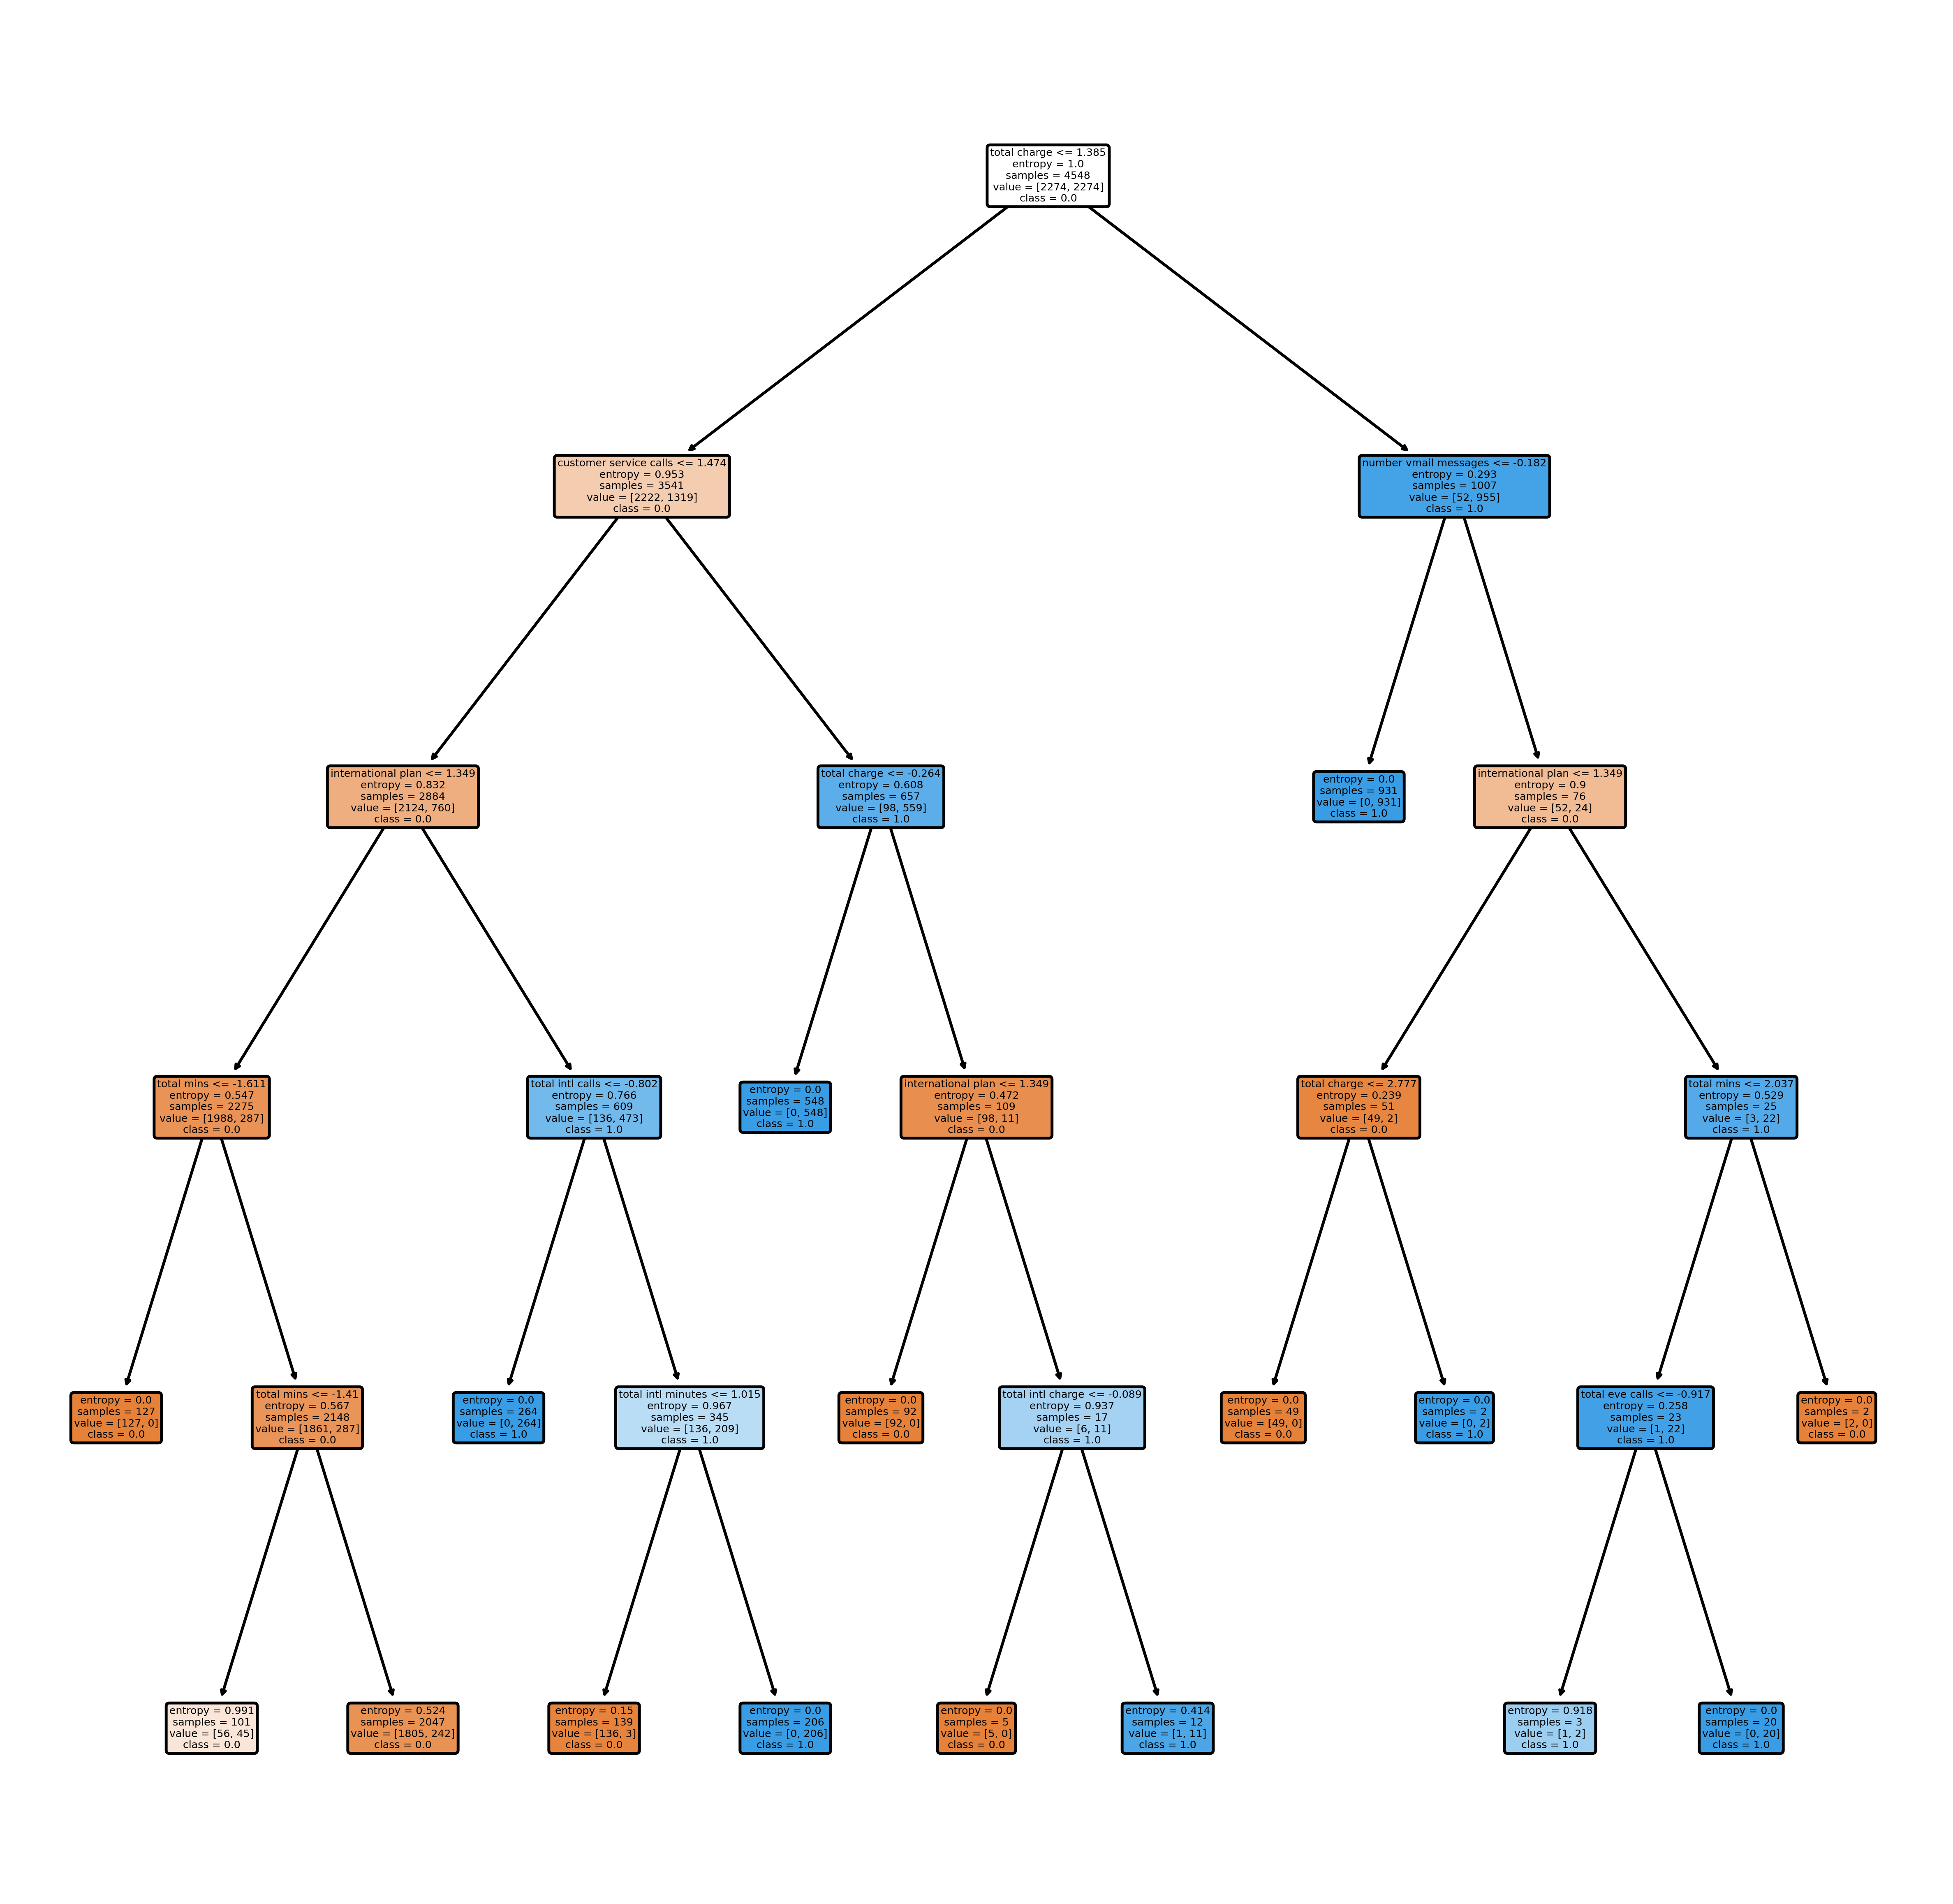

In [123]:
plt.figure(figsize=(12,12), dpi=500, edgecolor='black')

tree.plot_tree(FinalDT, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

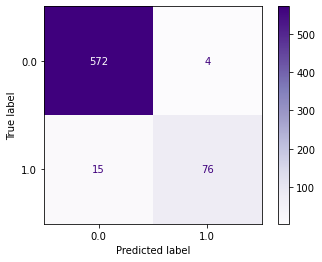

In [124]:
confusion_matrix(FinalDT, X_test_scaled, y_test)